# Facebook's Prophet Model

In [1]:
import psycopg2
import pandas as pd
from pandas import DataFrame
from pandas import concat
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import itertools
import numpy
from numpy import concatenate
from numpy import array
import seaborn as sns
import math
from math import sqrt

# ARIMA AND LSTM STUFF
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.layers import Dropout
from pandas import Series


import time

Using TensorFlow backend.


In [2]:
#conda install libpython m2w64-toolchain -c msys2
#pip install pystan
#pip install fbprophet

In [2]:
from fbprophet import Prophet


In [3]:
connection = psycopg2.connect(user = "equipo7",
                            password = "DLgndXy2m4hbWH-qn-Co",
                            host= "ds4a-demo-instance.cssn41frspmj.us-east-1.rds.amazonaws.com",
                            port = "5432",
                            database = "anahuac")
cursor = connection.cursor()
def runquery(query):
    df=pd.read_sql(query,connection)
    return df

In [4]:
where_date_clause = " WHERE date >= '2016-01-01' AND date <= '2020-03-01 00:00:00' ORDER BY date"; 

sqlQuery_workspace = "select * from final_table.metrics_compact " + where_date_clause
df_workspace = pd.DataFrame(runquery(sqlQuery_workspace))





In [5]:

df_workspace["pm10_st0"].fillna( method ='ffill', inplace = True) 
  

In [6]:
df_workspace.head()

,date,fecha,weekday,hora,co_st0,co_st1,co_st2,no_st0,no_st1,no_st2,...,pa_st2,uva_st0,uva_st1,uva_st2,uvb_st0,uvb_st1,uvb_st2,dewp_st0,dewp_st1,dewp_st2
0,2016-01-01 00:00:00,2016-01-01,4,0,1.30000,1.14,1.1250,22.2,18.8333,8.44444,...,585.40,0.0,0.0,0.0,0.0,0.0,0.0,4.35273,4.35273,4.35273
1,2016-01-01 01:00:00,2016-01-01,4,1,1.56667,1.40,1.4125,25.6,17.6667,12.11110,...,585.20,0.0,0.0,0.0,0.0,0.0,0.0,4.42452,4.42452,4.42452
2,2016-01-01 02:00:00,2016-01-01,4,2,1.68333,1.58,1.5000,30.0,25.3333,17.55560,...,584.75,0.0,0.0,0.0,0.0,0.0,0.0,4.22699,4.22699,4.22699
3,2016-01-01 03:00:00,2016-01-01,4,3,1.63333,1.88,1.5875,29.4,29.3333,20.44440,...,584.75,0.0,0.0,0.0,0.0,0.0,0.0,4.23862,4.23862,4.23862
4,2016-01-01 04:00:00,2016-01-01,4,4,1.76667,2.14,1.6875,30.0,35.3333,27.66670,...,584.75,0.0,0.0,0.0,0.0,0.0,0.0,4.39125,4.39125,4.39125


In [7]:
df_workspace.isnull().sum()

date        0
fecha       0
weekday     0
hora        0
co_st0      0
co_st1      0
co_st2      0
no_st0      0
no_st1      0
no_st2      0
no2_st0     0
no2_st1     0
no2_st2     0
nox_st0     0
nox_st1     0
nox_st2     0
o3_st0      0
o3_st1      0
o3_st2      0
pm10_st0    0
pm10_st1    0
pm10_st2    0
pm25_st0    0
pm25_st1    0
pm25_st2    0
pmco_st0    0
pmco_st1    0
pmco_st2    0
so2_st0     0
so2_st1     0
so2_st2     0
rh_st0      0
rh_st1      0
rh_st2      0
tmp_st0     0
tmp_st1     0
tmp_st2     0
wdr_st0     0
wdr_st1     0
wdr_st2     0
wsp_st0     0
wsp_st1     0
wsp_st2     0
pa_st0      0
pa_st1      0
pa_st2      0
uva_st0     0
uva_st1     0
uva_st2     0
uvb_st0     0
uvb_st1     0
uvb_st2     0
dewp_st0    0
dewp_st1    0
dewp_st2    0
dtype: int64

# Use prophet to compute PM10

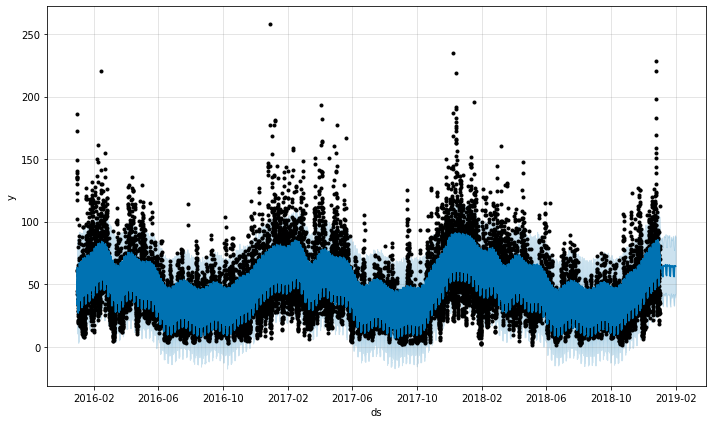

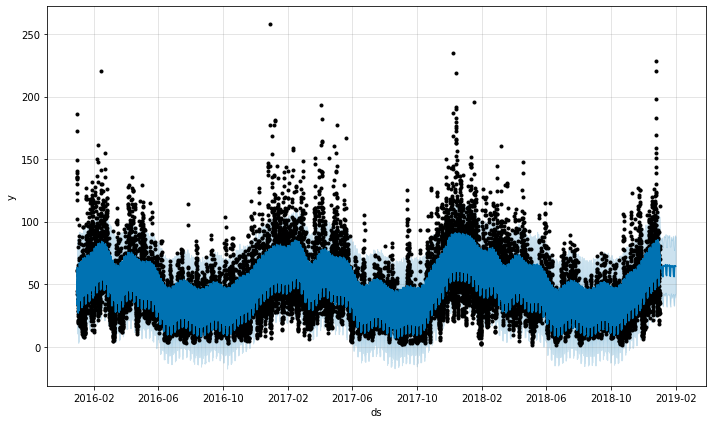

In [8]:
dffPM10 = df_workspace[['date','pm10_st0']]
dffPM10.columns = ['ds', 'y']
prediction_size = 30
train_dfp = dffPM10[:-8760] #hours in a year
m = Prophet()
m.fit(train_dfp)
future = m.make_future_dataframe(periods=prediction_size)

forecast = m.predict(future)
m.plot(forecast)

In [12]:
se = np.square(forecast.loc[:, 'yhat'] - dffPM10['y'])
mse = np.mean(se)
rmse = np.sqrt(mse)
rmse

18.16977070885245

In [15]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
26329,2019-01-26 23:00:00,51.197020,33.392378,81.416944,49.911268,52.135244,6.022147,6.022147,6.022147,-7.494729,...,-4.869824,-4.869824,-4.869824,18.386700,18.386700,18.386700,0.0,0.0,0.0,57.219167
26330,2019-01-27 23:00:00,51.241863,32.770857,77.425320,49.833502,52.222065,4.750998,4.750998,4.750998,-7.494729,...,-6.146446,-6.146446,-6.146446,18.392172,18.392172,18.392172,0.0,0.0,0.0,55.992861
26331,2019-01-28 23:00:00,51.286707,41.946188,88.103129,49.729027,52.355693,13.517426,13.517426,13.517426,-7.494729,...,2.571738,2.571738,2.571738,18.440417,18.440417,18.440417,0.0,0.0,0.0,64.804133
26332,2019-01-29 23:00:00,51.331550,39.457022,89.189298,49.638428,52.489216,12.844176,12.844176,12.844176,-7.494729,...,1.805189,1.805189,1.805189,18.533716,18.533716,18.533716,0.0,0.0,0.0,64.175727
26333,2019-01-30 23:00:00,51.376394,43.024649,87.961660,49.608945,52.673082,13.040413,13.040413,13.040413,-7.494729,...,1.861994,1.861994,1.861994,18.673148,18.673148,18.673148,0.0,0.0,0.0,64.416806


In [16]:
future

,ds
0,2016-01-01 00:00:00
1,2016-01-01 01:00:00
2,2016-01-01 02:00:00
3,2016-01-01 03:00:00
4,2016-01-01 04:00:00
...,...
26329,2019-01-26 23:00:00
26330,2019-01-27 23:00:00
26331,2019-01-28 23:00:00
26332,2019-01-29 23:00:00
